<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/MODIS_VIIRS_Scale_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you take a look at the climatology notebooks, you'll notice that the MODIS data for Chlorophyll a and k490 tends to have higher values than the VIIRS data. This means there is some kind of discrepancy in the way the two instruments are estimating chlorophyll, and it is likely that the newer one (VIIRS) is more accurate. Therefore, in this notebook I take all the data for VIIRS, plot it against MODIS, and do a rough best fit line to try to estimate a scale factor. **NOTE: this probably isn't a great way to do it. See the notebook called "MODIS & VIIRS Faster Comparisons" for a more accurate way of trying to scale MODIS to VIIRS. I believe that the scale factors in the output of that notebook are accurate enough for my purposes.**

In [ ]:
#First, some isntallations and imports:
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


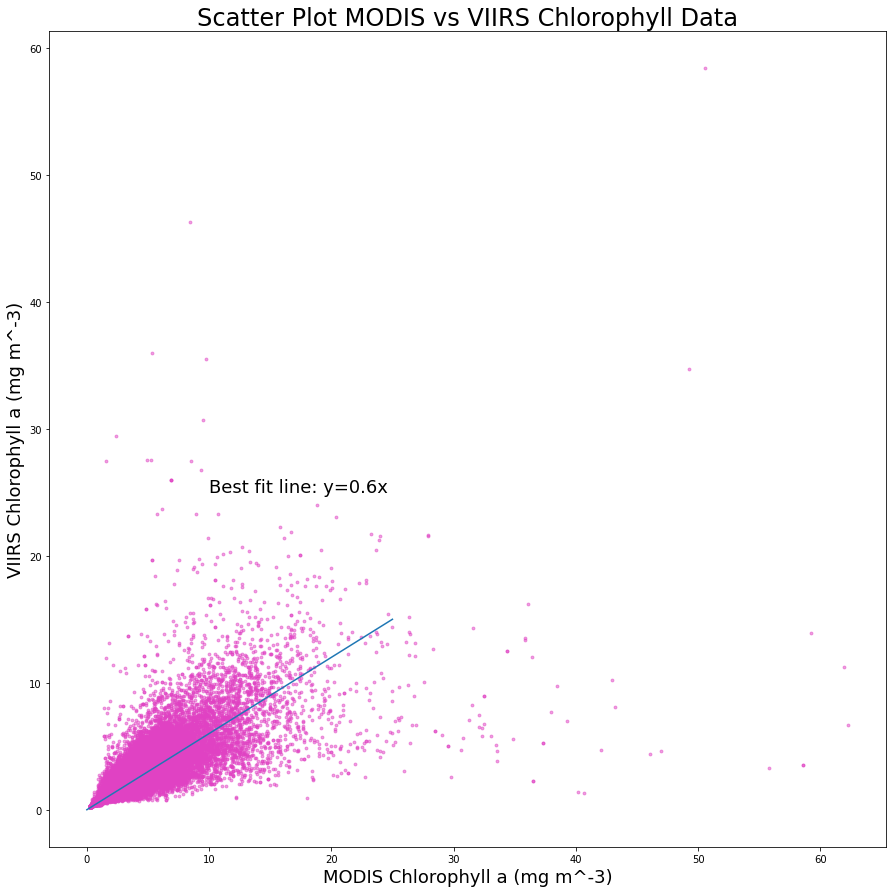

In [9]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/Phytoplankton_averages/Scale_Factors'
#I got these urls interactively from the ERDDAP server:
url1 = 'https://pricaimcit.services.brown.edu/erddap/griddap/erdMH1chlamday.nc?chlorophyll[(2012-01-16T00:00:00Z):1:(2020-05-16T00:00:00Z)][(41.5):1:(40.5)][(-72.65):1:(-70.25)]'
r1 = requests.get(url1, allow_redirects=True)
open('test.nc', 'wb').write(r1.content)
nc1 = NetCDFFile('test.nc')
nc1
chl1 = nc1.variables['chlorophyll'][:] #since I'm working with data from 2 datasets, I need to label chlorophyll variables as chl1 (from MODIS) and chl2 (from VIIRS)
url2 = 'https://pricaimcit.services.brown.edu/erddap/griddap/erdVH2018chlamday.nc?chla[(2012-01-15T00:00:00Z):1:(2020-05-15T00:00:00Z)][(41.5):1:(40.5)][(-72.65):1:(-70.25)]'
r2 = requests.get(url2, allow_redirects=True)
open('test.nc', 'wb').write(r2.content)
nc2 = NetCDFFile('test.nc')
nc2
chl2 = nc2.variables['chla'][:]
x = np.linspace(0,25, 100) #setting up for the best fit line by making a list of 100 numbers evenly space between 0 and 25
y = 0.6*x #setting up for the best fit line by setting y equal to 0.6*x
plt.figure(figsize=(15,15))
plt.scatter(chl1, chl2, alpha = 0.5, color='#E042C3', s=8) #doing some fancy stuff to make it look pretty
plt.title('Scatter Plot MODIS vs VIIRS Chlorophyll Data', fontsize=24)
plt.plot(x,y)
plt.xlabel('MODIS Chlorophyll a (mg m^-3)', fontsize=18)
plt.ylabel('VIIRS Chlorophyll a (mg m^-3)', fontsize=18)
plt.text(10, 25, 'Best fit line: y=0.6x', fontsize=18)
#plt.savefig(f"{images_dir}/Chlorophyll a Scale Factor.png")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


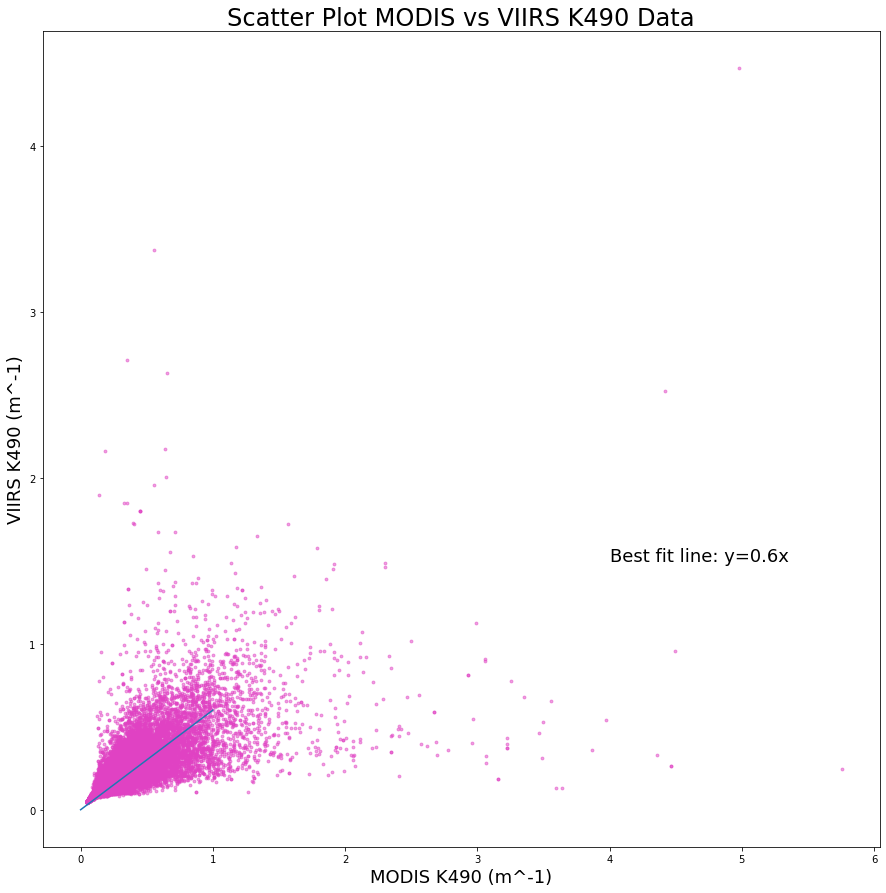

In [8]:
#I'm not going to comment this as much since it's exactly the same as above, just with k490 instead of chlorophyll. See the previous cell for more extensive commenting.
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/Phytoplankton_averages/Scale_Factors'
url1 = 'https://pricaimcit.services.brown.edu/erddap/griddap/erdMH1kd490mday.nc?k490[(2012-01-16T00:00:00Z):1:(2020-05-16T00:00:00Z)][(41.5):1:(40.5)][(-72.65):1:(-70.25)]'
r1 = requests.get(url1, allow_redirects=True)
open('test.nc', 'wb').write(r1.content)
nc1 = NetCDFFile('test.nc')
nc1
k4901 = nc1.variables['k490'][:]
url2 = 'https://pricaimcit.services.brown.edu/erddap/griddap/erdVH2018k490mday.nc?k490[(2012-01-15):1:(2020-05-15T00:00:00Z)][(41.5):1:(40.5)][(-72.65):1:(-70.25)]'
r2 = requests.get(url2, allow_redirects=True)
open('test.nc', 'wb').write(r2.content)
nc2 = NetCDFFile('test.nc')
nc2
k4902 = nc2.variables['k490'][:]
x = np.linspace(0,1, 100)
y = 0.6*x
plt.figure(figsize=(15,15))
plt.scatter(k4901, k4902, alpha = 0.5, color='#E042C3', s=8)
plt.title('Scatter Plot MODIS vs VIIRS K490 Data', fontsize=24)
plt.plot(x,y)
plt.xlabel('MODIS K490 (m^-1)', fontsize=18)
plt.ylabel('VIIRS K490 (m^-1)', fontsize=18)
plt.text(4,1.5, 'Best fit line: y=0.6x', fontsize=18)
#plt.savefig(f"{images_dir}/K490 Scale Factor.png")
plt.show()